In [25]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 25

In [26]:
df = pd.read_csv("https://dc-edu.itmo.ru/assets/courseware/v1/344bff205404e315b59430dffaedf04b/asset-v1:ITMO+DS+2024+type@asset+block/deliverytime.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
0,4607,INDORES13DEL02,37,4.9,3025.149286,0,0,1,0,1,0,24
1,B379,BANGRES18DEL02,34,4.5,20183.529729,0,0,1,0,0,1,33
2,5D6D,BANGRES19DEL01,23,4.4,1552.757802,1,0,0,0,1,0,26
3,7A6A,COIMBRES13DEL02,38,4.7,7790.401360,0,0,0,0,1,0,21
4,70A2,CHENRES12DEL01,32,4.6,6210.137966,0,0,1,0,0,1,30


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45593 non-null  object 
 1   Delivery_person_ID        45593 non-null  object 
 2   Delivery_person_Age       45593 non-null  int64  
 3   Delivery_person_Ratings   45593 non-null  float64
 4   distance_meters           45593 non-null  float64
 5   order_Drinks              45593 non-null  int64  
 6   order_Meal                45593 non-null  int64  
 7   order_Snack               45593 non-null  int64  
 8   vehicle_electric_scooter  45593 non-null  int64  
 9   vehicle_motorcycle        45593 non-null  int64  
 10  vehicle_scooter           45593 non-null  int64  
 11  Time_taken_min            45593 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


Избавьтесь от признаков ID и Delivery_person_ID. Удалите соответствующие колонки из набора данных. Определите количество оставшихся признаков.

In [28]:
df = df.drop(['ID', 'Delivery_person_ID'], axis=1)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
0,37,4.9,3025.149286,0,0,1,0,1,0,24
1,34,4.5,20183.529729,0,0,1,0,0,1,33
2,23,4.4,1552.757802,1,0,0,0,1,0,26
3,38,4.7,7790.401360,0,0,0,0,1,0,21
4,32,4.6,6210.137966,0,0,1,0,0,1,30


In [29]:
len(df.columns)

10

Некоторые заказы могли быть сделаны с ошибкой, например частая проблема заключается в том, что клиент забыл выключить VPN. Попробуем избавиться от некоторых таких заказов.

Уберите из рассмотрения заказы, у которых в колонке distance_meters значение более 100 км.

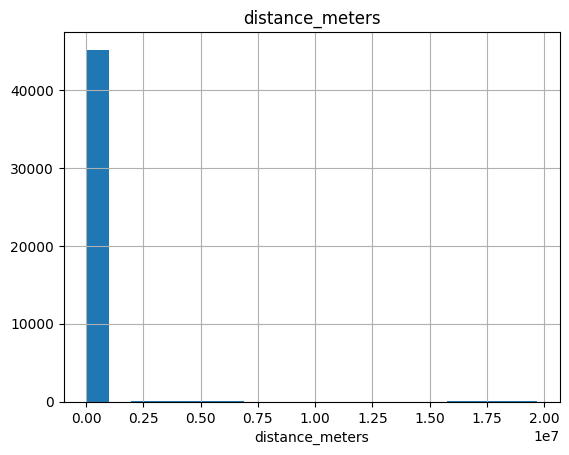

In [30]:
df['distance_meters'].hist(bins=20)
plt.xlabel('distance_meters')
plt.title('distance_meters')
plt.show()

In [31]:
df = df[df['distance_meters']<=100000]

Код df = df[df['distance_meters'] <= 100000] выполняет фильтрацию DataFrame df, оставляя только те строки, где значение в столбце distance_meters меньше или равно 100000.

Подробное объяснение
Фильтрация DataFrame:

df['distance_meters'] <= 100000 создает булеву маску (массив из True и False), где True соответствует строкам, где значение в столбце distance_meters меньше или равно 100000, а False — строкам, где значение больше 100000.

Применение фильтра:

df[df['distance_meters'] <= 100000] применяет эту маску к DataFrame df, оставляя только те строки, где маска равна True.

Присвоение результата:

Результат фильтрации присваивается обратно переменной df, таким образом, df теперь содержит только строки, удовлетворяющие условию.

Введите размер полученного набора данных.

Каким стало наибольшее значение в колонке distance_meters?

In [32]:
df.shape[0]

45162

In [33]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min
count,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000
mean,29.540012,4.632691,9735.396236,0.248550,0.250919,0.253045,0.083034,0.580931,0.334905,26.298038
std,5.692706,0.322902,5608.507582,0.432177,0.433547,0.434761,0.275937,0.493412,0.471963,9.383733
min,15.000000,1.000000,1465.067405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,4663.411525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,29.000000,4.700000,9220.209378,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,34.000000,4.800000,13681.490406,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,32.000000
max,50.000000,6.000000,20969.489380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000


In [34]:
df['distance_meters'].max()

20969.489380087085

Построение базовой модели регрессии

Первое приближение

Построим базовую модель линейной регрессии и попытаемся предсказать время доставки заказов только по информации о доставщике и расстоянию от ресторана до клиента. Здесь мы не будем смотреть на состав заказа и тип транспортного средства.

Отберите из набора данных только признаки Delivery_person_Age, Delivery_person_Ratings, distance_meters и целевой признак Time_taken_min. При помощи train_test_split разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=25.

In [35]:
from sklearn.model_selection import train_test_split

y = df["Time_taken_min"]
X = df.drop(columns=["Time_taken_min","order_Drinks","order_Meal","order_Snack",
             "vehicle_electric_scooter","vehicle_motorcycle","vehicle_scooter"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Посмотрим какой средний возраст доставщиков в тренировочной выборке.

Вычислите выборочное среднее колонки Delivery_person_Age тренировочного набора данных.

In [36]:
X_train['Delivery_person_Age'].mean()

29.54385673558637

Далее перейдем к построению первой модели и её оценке.

Обучите модель LinearRegression() с параметрами по умолчанию на тренировочных данных. Оцените на тестовых данных.

Вычислите mean_absolute_error() для тестового набора данных.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

6.3319638433910095

Масштабирование признаков


Теперь попробуем добавить информацию о составе заказа и типе транспортного средства, а также сделать такую предобработку данных, как масштабирование нецелевых признаков. Ведь такое преобразование часто полезно для модели линейной регрессии.

Верните в рассмотрение все признаки, кроме ID и Delivery_person_ID. Обучите преобразование MinMaxScaler() на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

In [38]:
from sklearn.preprocessing import MinMaxScaler

y = df["Time_taken_min"]
X = df.drop(columns=["Time_taken_min"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter
9154,0.257143,0.74,0.001696,0.0,0.0,0.0,0.0,1.0,0.0
11428,0.628571,0.78,0.631782,0.0,1.0,0.0,0.0,1.0,0.0
33705,0.457143,0.64,0.782228,0.0,1.0,0.0,0.0,1.0,0.0
15614,0.657143,0.62,0.317018,0.0,1.0,0.0,0.0,1.0,0.0
37986,0.628571,0.80,0.933022,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
36042,0.428571,0.72,0.482056,0.0,0.0,0.0,0.0,1.0,0.0
27015,0.600000,0.76,0.800318,0.0,1.0,0.0,0.0,1.0,0.0
6690,0.571429,0.78,0.084655,1.0,0.0,0.0,0.0,1.0,0.0
25123,0.400000,0.70,0.081700,0.0,0.0,1.0,0.0,1.0,0.0


Посмотрим как изменилось среднее значение в колонке, отвечающей за возраст доставщика. Теперь значение должно быть от 0 до 1.

Вычислите выборочное среднее колонки Delivery_person_Age полученного тренировочного набора данных.

In [39]:
X_train['Delivery_person_Age'].mean()

0.4155387638738963

Повторим обучение и посмотрим изменилось ли качество модели.

Обучите модель LinearRegression() с параметрами по умолчанию на тренировочных данных. Оцените на тестовых данных.

Вычислите mean_absolute_error() для тестового набора данных.

In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

6.258556157580087

3. Построение модели классификации


Представим, что ресторан хочет привлечь больше клиентов гарантией быстрой доставки и различными скидками в случае долгой доставки. Важно заранее научиться классифицировать заказы на те, которые сможем доставить быстро и на более длительные. Например, быстрой доставкой назовем те, которые занимают не больше 30 минут.

Используя набор данных, полученный на предыдущем шаге, замените целевой признак Time_taken_min на новый признак is_long_Delivery, значение которого равно 0 для быстрой доставки и 1 в противном случае.

In [41]:
df['is_long_Delivery'] = df['Time_taken_min'] > 30
df['is_long_Delivery'] = df['is_long_Delivery'].astype(int)
df

,Delivery_person_Age,Delivery_person_Ratings,distance_meters,order_Drinks,order_Meal,order_Snack,vehicle_electric_scooter,vehicle_motorcycle,vehicle_scooter,Time_taken_min,is_long_Delivery
0,37,4.9,3025.149286,0,0,1,0,1,0,24,0
1,34,4.5,20183.529729,0,0,1,0,0,1,33,1
2,23,4.4,1552.757802,1,0,0,0,1,0,26,0
3,38,4.7,7790.401360,0,0,0,0,1,0,21,0
4,32,4.6,6210.137966,0,0,1,0,0,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,1489.845884,0,1,0,0,1,0,32,1
45589,21,4.6,11007.734764,0,0,0,0,1,0,36,1
45590,30,4.9,4657.195394,1,0,0,0,0,1,16,0
45591,20,4.7,6232.393050,0,0,1,0,1,0,26,0


Определите долю быстрых доставок.

In [42]:
1 - df['is_long_Delivery'].mean()

0.7012975510384837

Не забудьте удалить признак Time_taken_min. Далее решим задачу классификации, целевым признаком будет is_long_Delivery.

In [43]:
df = df.drop(["Time_taken_min"], axis=1)

In [44]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_meters',
       'order_Drinks', 'order_Meal', 'order_Snack', 'vehicle_electric_scooter',
       'vehicle_motorcycle', 'vehicle_scooter', 'is_long_Delivery'],
      dtype='object')

In [21]:
len(df.columns)

10

Метод k-NN

При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=25. Также используйте стратификацию по целевому признаку is_long_Delivery.

In [45]:
y = df["is_long_Delivery"]
X = df.drop(["is_long_Delivery"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

Обучите модель KNeighborsClassifier() с параметрами по умолчанию на тренировочных данных. Оцените на тестовых данных.

Вычислите accuracy_score() для тестового набора данных.

результат 0.7301007417247869 показывает то, насколько хорошо наш метод справляется с предсказанием того, что доставка будет быстрой.

СТРАННО ПОЧЕМУ МАССИВ ТУТ БЕЗ МАСШТАБТРОВАНИЯ СДЕЛАН ??????

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7301007417247869

In [47]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])


                                                  ДАЛЕЕ ДОПОЛНИТЕЛЬНО  

In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.73


Добавим масштабирование данных в код с использованием MinMaxScaler или StandardScaler. Это позволит нормализовать признаки и улучшить работу модели k-NN.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # Или StandardScaler

# Выделяем целевую переменную и признаки
y = df["is_long_Delivery"]
X = df.drop(["is_long_Delivery"], axis=1)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

# Масштабируем данные
scaler = MinMaxScaler()  # Или StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Масштабируем обучающие данные
X_test_scaled = scaler.transform(X_test)  # Масштабируем тестовые данные

# Создаем и обучаем модель k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)  # Обучаем на масштабированных данных

# Делаем предсказания на тестовых данных
y_pred_scaled = knn_model.predict(X_test_scaled)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred_scaled)
print("Accuracy с масштабированием данных:", accuracy)

Accuracy с масштабированием данных: 0.8056016827189195


In [76]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_scaled)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6335
           1       0.73      0.55      0.63      2698

    accuracy                           0.81      9033
   macro avg       0.78      0.73      0.75      9033
weighted avg       0.80      0.81      0.80      9033



Матрица ошибок помогает понять, как часто модель ошибается в предсказаниях для каждого класса.

Вы можете использовать confusion_matrix из sklearn.metrics:

Это создаст тепловую карту, где каждая ячейка показывает количество предсказаний для каждой пары "истинный класс" и "предсказанный класс".

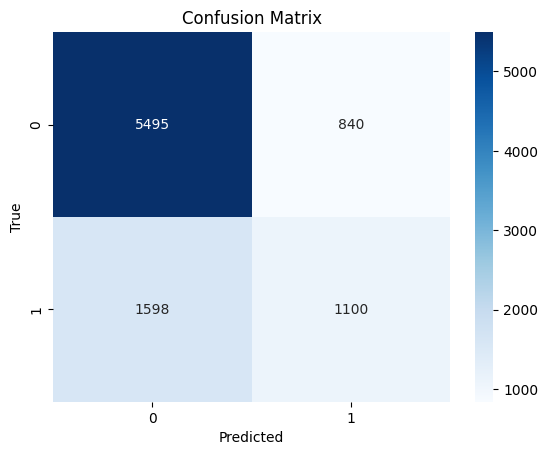

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Отчет о классификации (Classification Report):

Отчет о классификации предоставляет более детальную информацию о производительности модели, включая точность, полноту и F1-меру для каждого класса.

Вы можете использовать classification_report из sklearn.metrics:

Это выведет текстовый отчет с метриками для каждого класса.

In [77]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)     # Без масштабирования признаков
print(report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      6335
           1       0.57      0.41      0.47      2698

    accuracy                           0.73      9033
   macro avg       0.67      0.64      0.65      9033
weighted avg       0.71      0.73      0.72      9033



In [78]:
Accuracy: 0.85

In [79]:
len(df.columns)

10

In [80]:
df.shape

(45162, 10)

**Далее графики без масштабирования:**

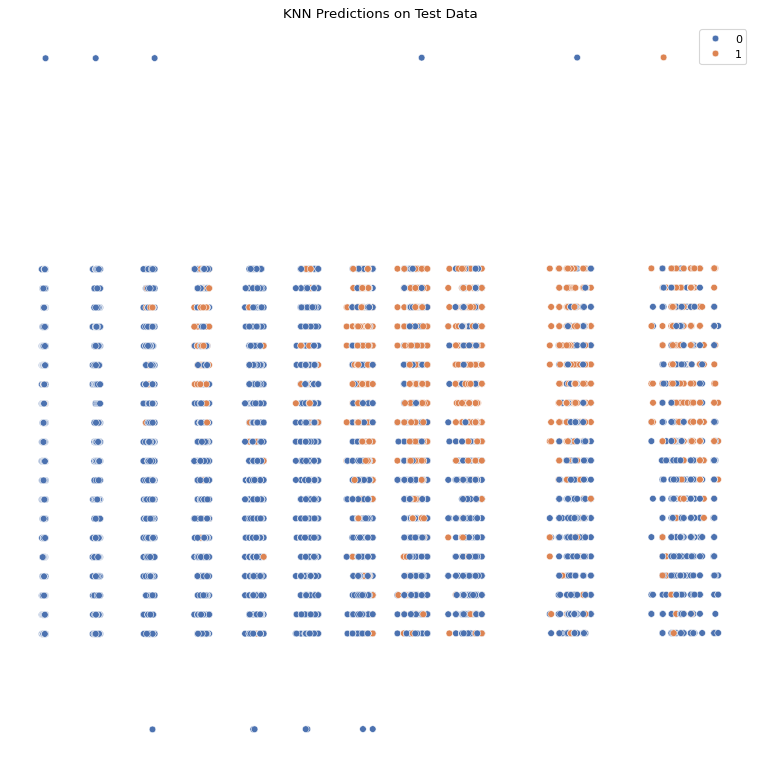

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Для уменьшения размерности, если данные не двумерные
from matplotlib.pyplot import figure

# Если данные не двумерные, применяем PCA для уменьшения размерности
if X_train.shape[1] > 2:
    pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
    X_test_2d = pca.fit_transform(X_test)  # Преобразуем тестовые данные
else:
    X_test_2d = X_test  # Если данные уже двумерные, используем их как есть

# Визуализация результатов
figure(figsize=(12, 12), dpi=80)
plt.axis("off")

# Используем scatterplot для визуализации данных
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_pred, palette="deep")

# Добавляем заголовок и отображаем график
plt.title("KNN Predictions on Test Data")
plt.show()

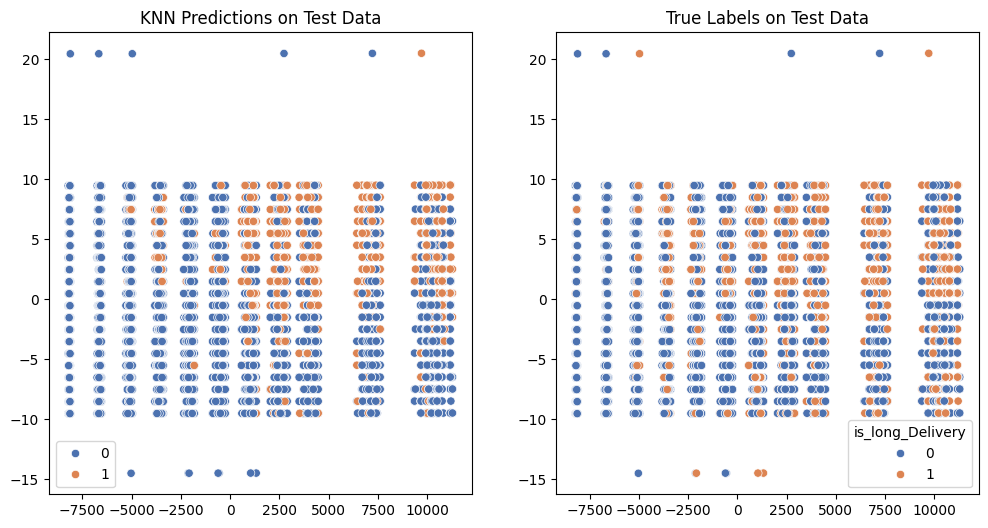

In [61]:
plt.figure(figsize=(12, 6))

# График с предсказанными классами
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_pred, palette="deep")
plt.title("KNN Predictions on Test Data")

# График с реальными классами
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_test, palette="deep")
plt.title("True Labels on Test Data")

plt.show()

**Визуализация всех данных (X_train + X_test):**

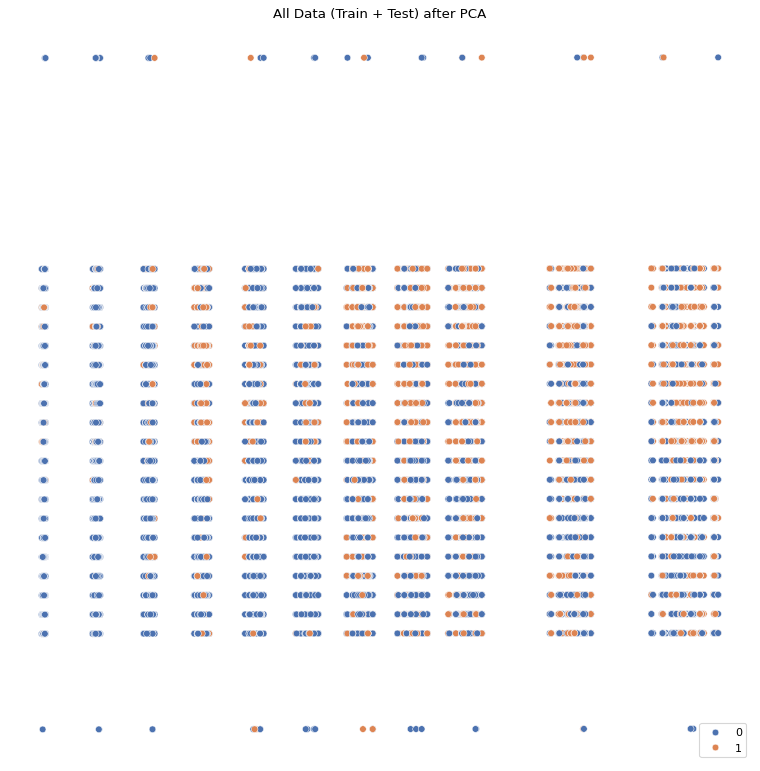

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

# Объединяем обучающие и тестовые данные
X_all = np.vstack((X_train, X_test))  # Объединяем по строкам
y_all = np.hstack((y_train, y_test))  # Объединяем метки

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
X_all_2d = pca.fit_transform(X_all)  # Преобразуем все данные

# Визуализация результатов
figure(figsize=(12, 12), dpi=80)
plt.axis("off")

# Используем scatterplot для визуализации данных
sns.scatterplot(x=X_all_2d[:, 0], y=X_all_2d[:, 1], hue=y_all, palette="deep")

# Добавляем заголовок и отображаем график
plt.title("All Data (Train + Test) after PCA")
plt.show()

**Визуализация только обучающих данных (X_train):**

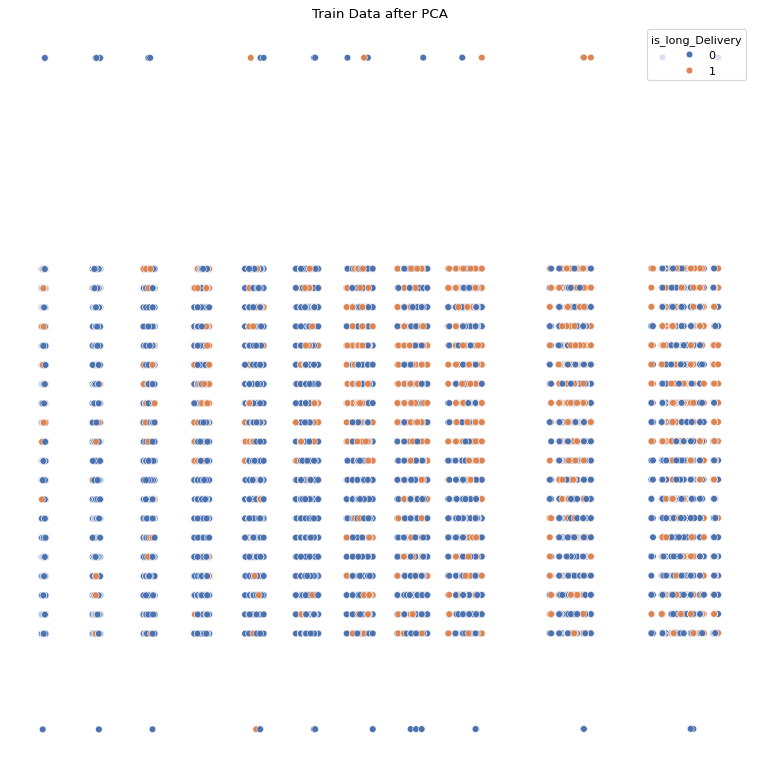

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)  # Преобразуем обучающие данные

# Визуализация результатов
figure(figsize=(12, 12), dpi=80)
plt.axis("off")

# Используем scatterplot для визуализации данных
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette="deep")

# Добавляем заголовок и отображаем график
plt.title("Train Data after PCA")
plt.show()

**Визуализация тестовых данных (X_test) с предсказаниями:**

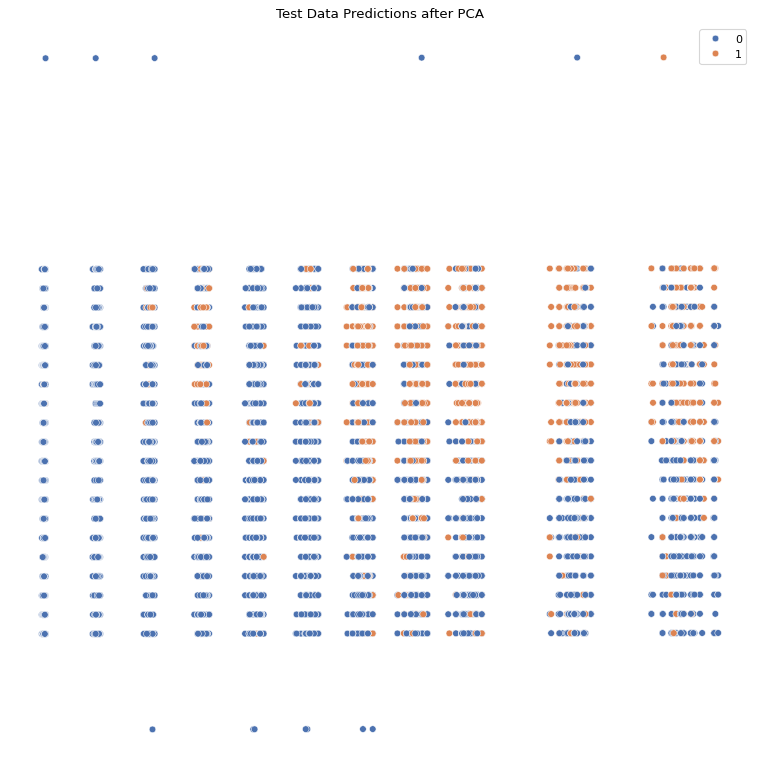

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)  # Преобразуем тестовые данные

# Визуализация результатов
figure(figsize=(12, 12), dpi=80)
plt.axis("off")

# Используем scatterplot для визуализации данных
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_pred, palette="deep")

# Добавляем заголовок и отображаем график
plt.title("Test Data Predictions after PCA")
plt.show()

KMeans разделение на обучающую и тестовую выборки не требуется. KMeans — это алгоритм кластеризации, а не классификации. Он работает без учителя, то есть не использует метки классов (y). Его задача — найти структуру в данных, группируя их на кластеры.

Зачем тогда я использовал train_test_split?
В нашем случае используем train_test_split, чтобы:

Обучить KMeans на части данных (X_train).

Применить обученную модель к другой части данных (X_test) и сравнить результаты с истинными метками (y_test).

Это было сделано для демонстрации, как можно сравнить результаты кластеризации с истинными классами. Однако это не стандартный подход для KMeans.

In [49]:
X = df.drop(["is_long_Delivery"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)


Подумаем - ак KMeans определяет кластеры на 20% данных?

KMeans не "определяет" кластеры на тестовых данных. Вместо этого:

Он обучается на обучающих данных (X_train) и находит центроиды кластеров.

Затем он применяет эти центроиды к тестовым данным (X_test), чтобы назначить каждую точку тестовой выборки к ближайшему кластеру.

Таким образом, KMeans не переобучается на тестовых данных. Он просто использует центроиды, найденные на обучающих данных.

In [56]:
from sklearn.cluster import KMeans

# Применяем K-means с n_clusters=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)  # Обучаем на обучающих данных
y_kmeans = kmeans.predict(X_test)  # Предсказываем кластеры для тестовых данных

# Сравниваем с истинными классами
from sklearn.metrics import accuracy_score

# Поскольку K-means не знает о классах, метки кластеров могут быть перепутаны
# Например, кластер 0 может соответствовать классу 1, и наоборот
# Поэтому используем accuracy_score с перестановкой меток
accuracy = accuracy_score(y_test, y_kmeans)
print("Accuracy (K-means vs true labels):", accuracy)


Accuracy (K-means vs true labels): 0.67087346396546


In [52]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Создаем confusion matrix
cm = confusion_matrix(y_test, y_kmeans)

# Переставляем метки, чтобы максимизировать accuracy
if cm[0, 0] + cm[1, 1] < cm[0, 1] + cm[1, 0]:
    y_kmeans = 1 - y_kmeans  # Меняем метки местами

accuracy = accuracy_score(y_test, y_kmeans)
print("Accuracy (after label permutation):", accuracy)

Accuracy (after label permutation): 0.67087346396546


**Надо ли делать разделение на train/test для KMeans?**

Короткий ответ:

Разделение на train/test для KMeans не требуется. Однако это может быть полезно в некоторых случаях:

Если мы хотим сравнить результаты кластеризации с истинными метками (как в нашем случае).

Если мы хотим оценить устойчивость кластеризации на разных подмножествах данных.

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Применяем KMeans ко всем данным
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)  # Обучаем на всех данных
y_kmeans = kmeans.predict(X)  # Назначаем кластеры для всех данных

# Сравниваем с истинными метками
cm = confusion_matrix(y, y_kmeans)

# Переставляем метки, чтобы максимизировать accuracy
if cm[0, 0] + cm[1, 1] < cm[0, 1] + cm[1, 0]:
    y_kmeans = 1 - y_kmeans  # Меняем метки местами

accuracy = accuracy_score(y, y_kmeans)
print("Accuracy (K-means vs true labels):", accuracy)

Accuracy (K-means vs true labels): 0.6581196581196581


**Accuracy (точность) — это метрика, которая показывает, какая доля объектов была правильно классифицирована. Формула:**

Accuracy
=
Количество правильных предсказаний
Общее количество объектов
Accuracy=
Общее количество объектов
Количество правильных предсказаний
​

В вашем случае:

Accuracy = 0.6581, то есть 65.81% данных были правильно сопоставлены с истинными метками.

**Если Accuracy близко к 0.5:**

Это означает, что KMeans работает не лучше случайного угадывания.

Например, если у вас два класса, случайное угадывание даст Accuracy = 0.5.

**Если Accuracy больше 0.5:**

Это означает, что KMeans нашел некоторую структуру в данных, которая частично совпадает с истинными метками.

В нашем случае Accuracy = 0.6581 говорит о том, что KMeans смог найти частичную корреляцию между признаками и истинными метками.

**Если Accuracy близко к 1.0:**

Это означает, что KMeans почти идеально разделил данные в соответствии с истинными метками.

**Использование elbow method для выбора количества кластеров:**

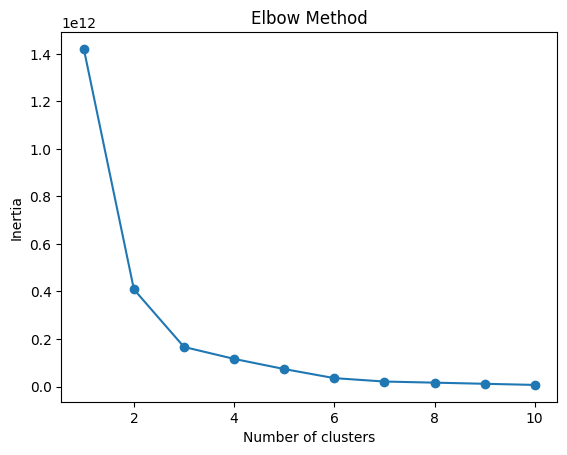

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Вычисляем сумму квадратов расстояний (inertia) для разного количества кластеров
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Строим график elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**Использование silhouette score:**

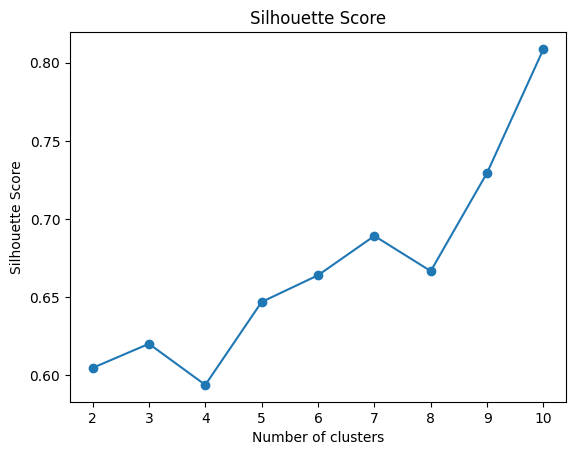

In [57]:
from sklearn.metrics import silhouette_score

# Вычисляем silhouette score для разного количества кластеров
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Строим график silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Silhouette Score for 2 clusters: 0.6047
Silhouette Score for 3 clusters: 0.6201
Silhouette Score for 4 clusters: 0.5938
Silhouette Score for 5 clusters: 0.6469


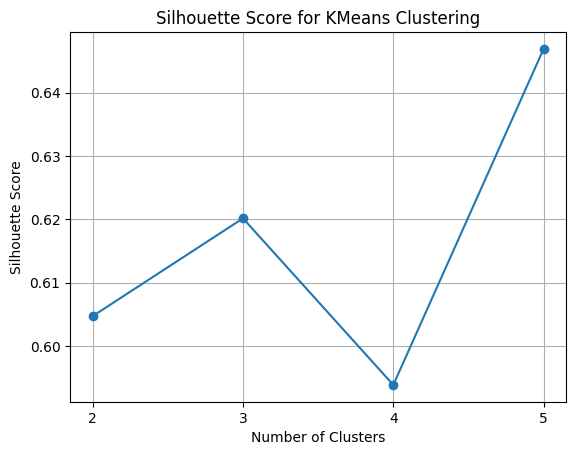

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Рассчитываем силуэтный коэффициент для количества кластеров от 2 до 5
# Для 1 кластера силуэтный коэффициент не рассчитывается, так как он не имеет смысла
silhouette_scores = []
cluster_range = range(2, 6)  # От 2 до 5 кластеров

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Обучаем KMeans на данных
    score = silhouette_score(X, kmeans.labels_)  # Рассчитываем силуэтный коэффициент
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Визуализируем результаты
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

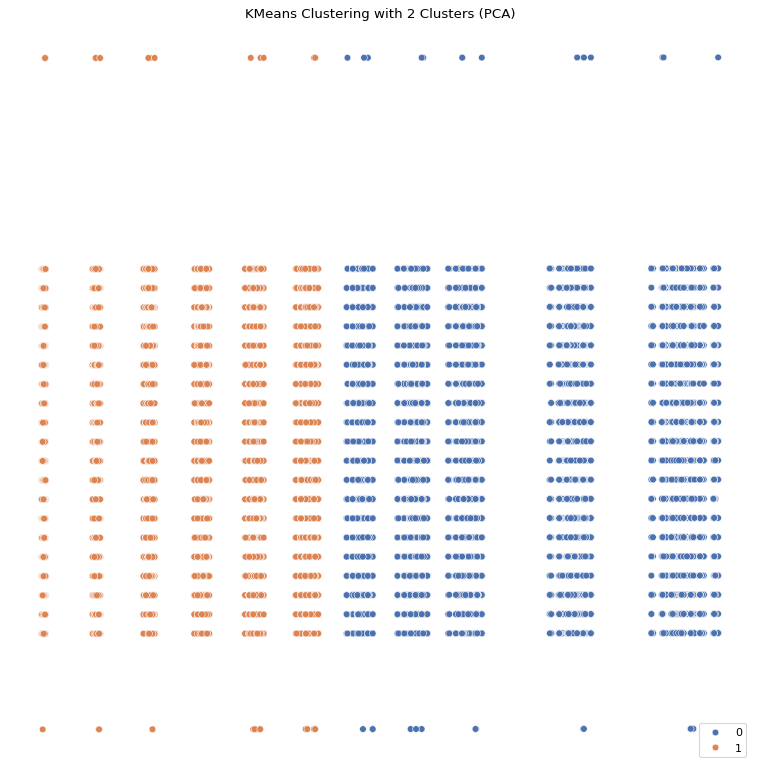

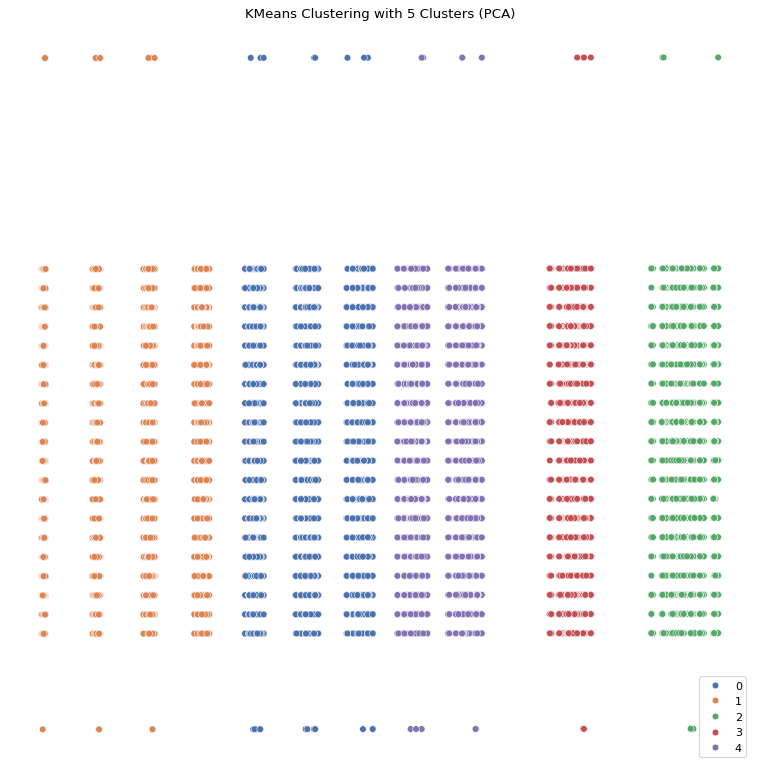

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Преобразуем все данные

# Функция для визуализации кластеров
def plot_clusters(n_clusters, X_pca, y_kmeans):
    figure(figsize=(12, 12), dpi=80)
    plt.axis("off")

    # Визуализируем данные с цветами, соответствующими кластерам
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette="deep", legend="full")

    # Добавляем заголовок
    plt.title(f"KMeans Clustering with {n_clusters} Clusters (PCA)")
    plt.show()

# Кластеризация для 2 кластеров
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)  # Назначаем кластеры для всех данных
plot_clusters(2, X_pca, y_kmeans_2)  # Визуализируем

# Кластеризация для 5 кластеров
kmeans_5 = KMeans(n_clusters=5, random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X)  # Назначаем кластеры для всех данных
plot_clusters(5, X_pca, y_kmeans_5)  # Визуализируем

Выше получили не очнь информативные графики, попробуем исправить результат и сделат лучше.

Нормализация данных:

Мы добавили StandardScaler, чтобы нормализовать данные перед PCA.

Это помогает PCA правильно работать с признаками, которые имеют разные масштабы.

PCA на нормализованных данных:

Мы применили PCA к нормализованным данным (X_scaled), чтобы уменьшить их размерность до 2 компонент.

Визуализация:

Мы используем seaborn.scatterplot для визуализации данных после PCA.

Точки раскрашиваются в зависимости от их кластера.

Также можно использовать

такие как t-SNE или UMAP

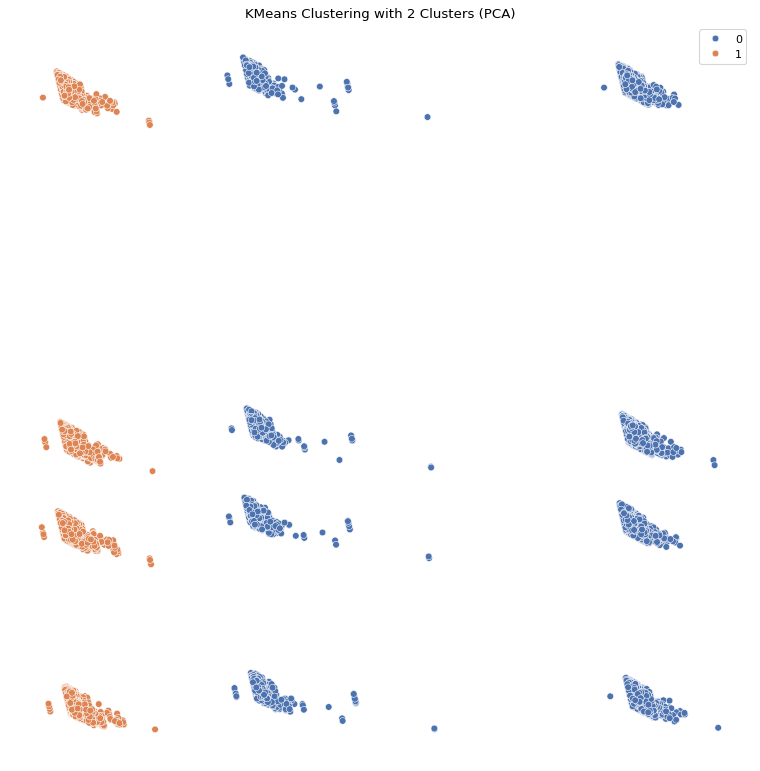

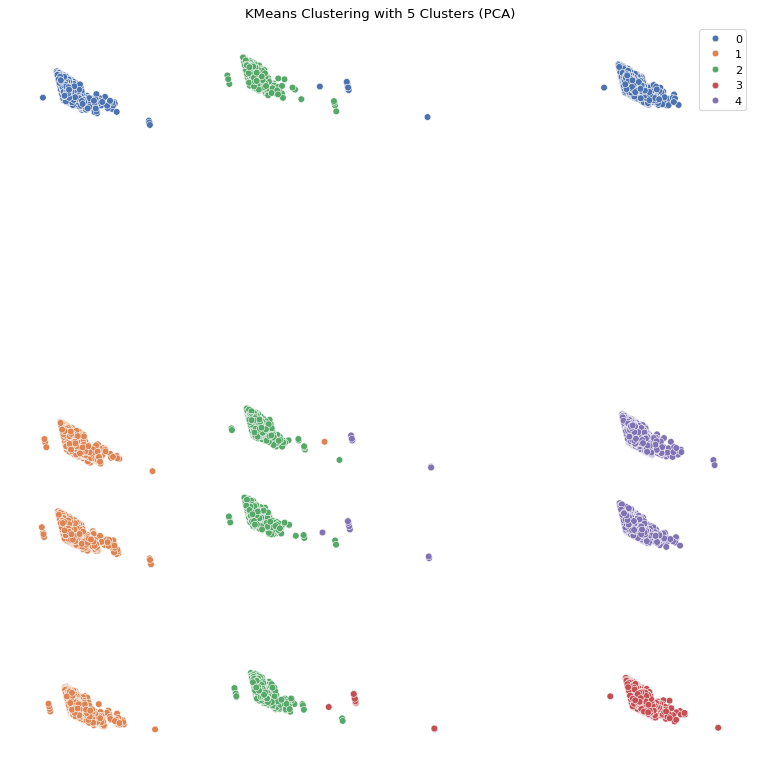

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Преобразуем нормализованные данные

# Функция для визуализации кластеров
def plot_clusters(n_clusters, X_pca, y_kmeans):
    figure(figsize=(12, 12), dpi=80)
    plt.axis("off")

    # Визуализируем данные с цветами, соответствующими кластерам
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette="deep", legend="full")

    # Добавляем заголовок
    plt.title(f"KMeans Clustering with {n_clusters} Clusters (PCA)")
    plt.show()

# Кластеризация для 2 кластеров
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X_scaled)  # Обучаем на нормализованных данных
plot_clusters(2, X_pca, y_kmeans_2)  # Визуализируем

# Кластеризация для 5 кластеров
kmeans_5 = KMeans(n_clusters=5, random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X_scaled)  # Обучаем на нормализованных данных
plot_clusters(5, X_pca, y_kmeans_5)  # Визуализируем

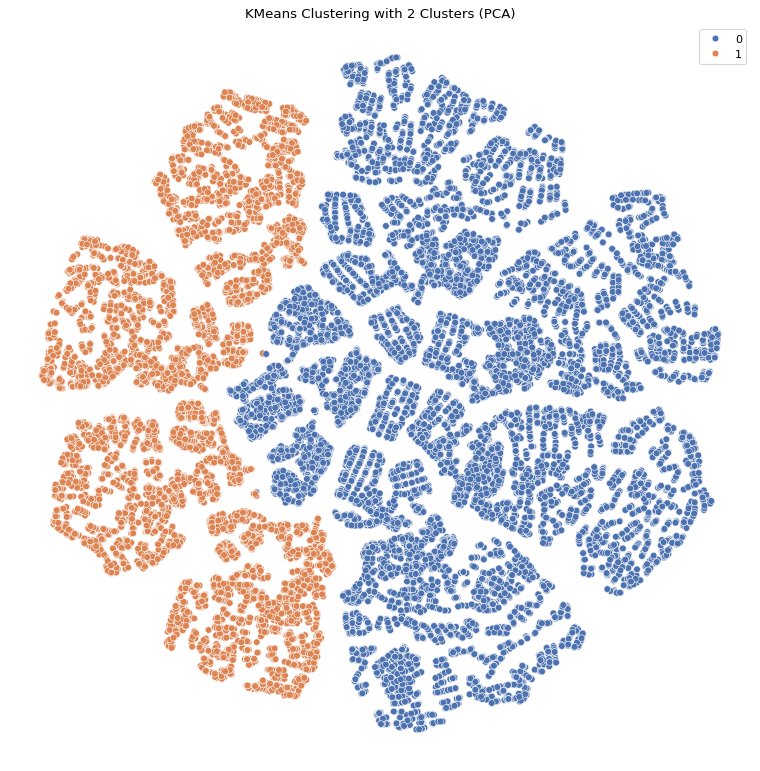

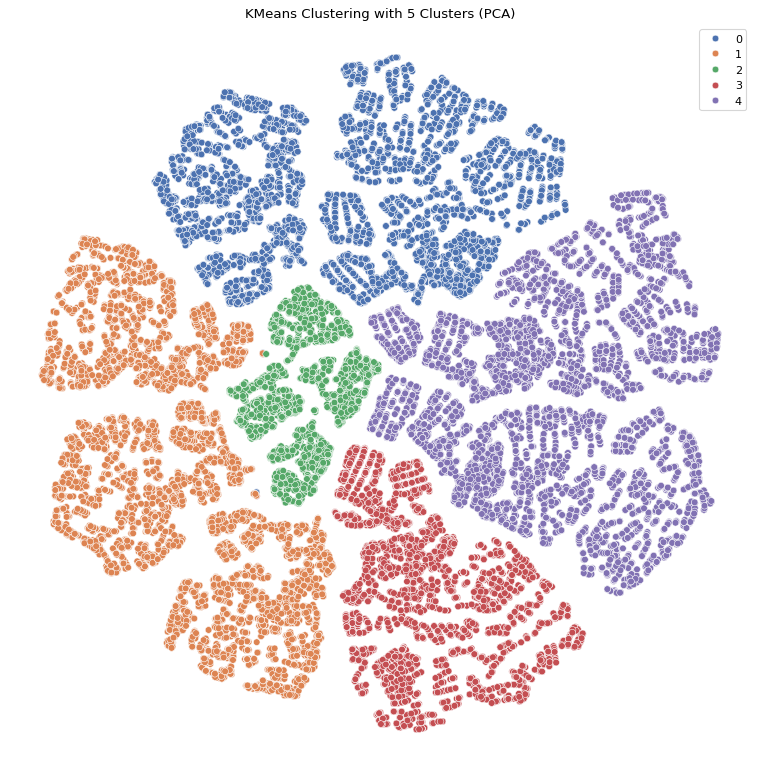

In [66]:
from sklearn.manifold import TSNE

# Применяем t-SNE для уменьшения размерности до 2 компонент
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)  # Преобразуем нормализованные данные

# Визуализация для 2 кластеров
plot_clusters(2, X_tsne, y_kmeans_2)  # Визуализируем

# Визуализация для 5 кластеров
plot_clusters(5, X_tsne, y_kmeans_5)  # Визуализируем